# Income prediction
Predicting the Income of the Adults.


In [1]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

# Exploring the data.

In [3]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [8]:
# Checking whether the data has any null values.
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning.

In [10]:
# Dropping the unwanted columns.
df.drop('capital-loss', axis=1, inplace=True)

In [11]:
# Replacing ? with nan values.
df['occupation'].replace(' ?', np.nan, inplace=True)
df['country'].replace(' ?', np.nan, inplace=True)
df['workclass'].replace(' ?', np.nan, inplace=True)

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [13]:
# Imputing the null values.
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
hours-per-week    0
country           0
salary            0
dtype: int64

# Exploratory Data Analysis.

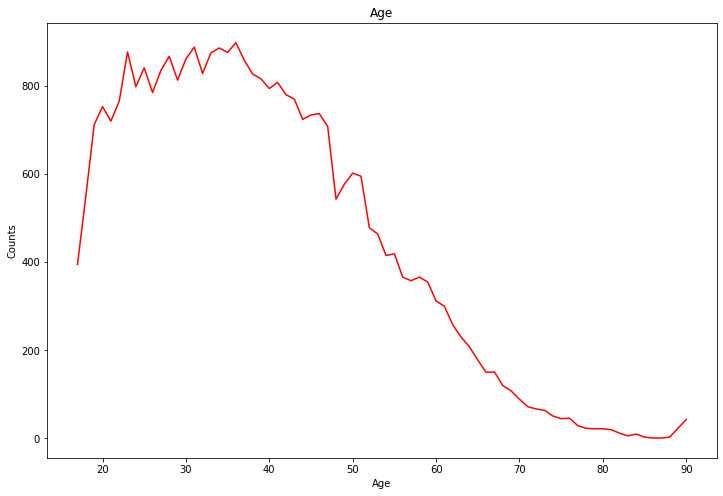

In [15]:
age = df['age'].value_counts()
sns.lineplot(data=age, color='red')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

### Observation : More number of people's age are between 20 - 60.

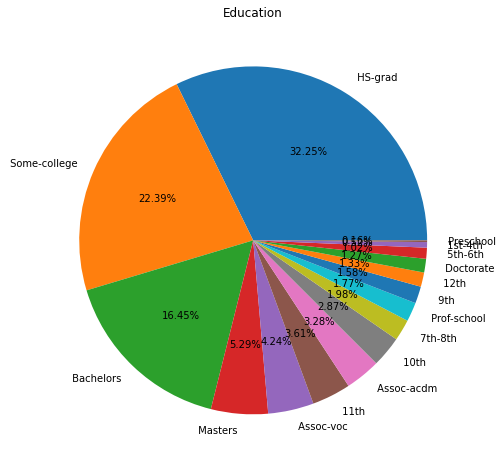

In [16]:
values = df['education'].value_counts().values
labels = df['education'].value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Education')
plt.show()

### Observation : More number of people are High School graduates.

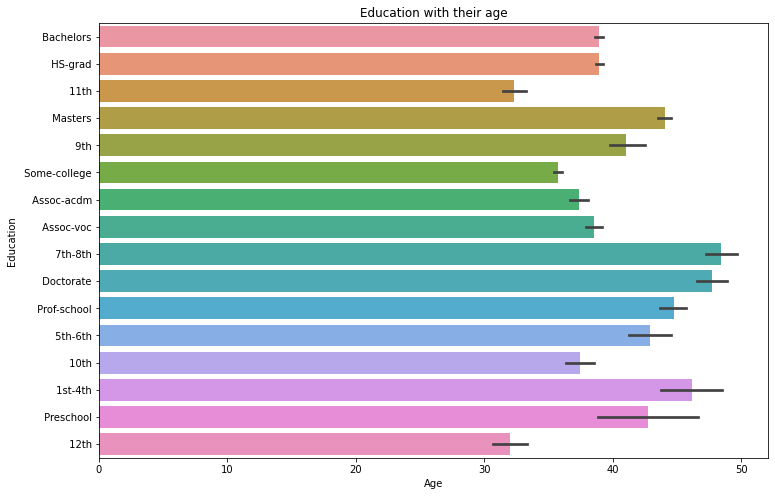

In [17]:
sns.barplot(x='age', y='education', data=df)
plt.title('Education with their age')
plt.xlabel('Age')
plt.ylabel('Education')
plt.show()

### Observation : More numbers of people's education are 7th - 8th and Doctorate with the age between 45 - 50.

In [18]:
country_education = df.groupby(['country','education']).size().reset_index().rename(columns={0:'Counts'})

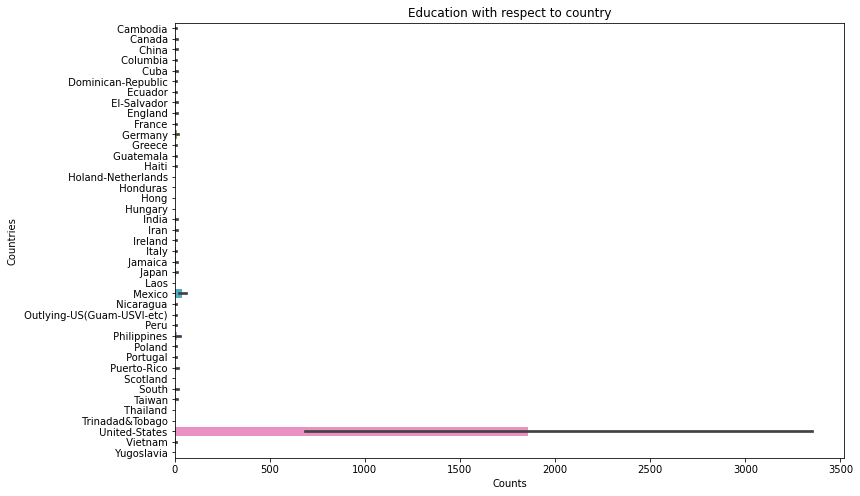

In [19]:
sns.barplot(x='Counts', y='country', data=country_education)
plt.title('Education with respect to country')
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.show()

### Observation : United states has the counts of educated peoples.

In [20]:
education_with_race = df.groupby(['education','race','sex']).size().reset_index().rename(columns={0:'Counts'})
education_with_race

,education,race,sex,Counts
0,10th,Amer-Indian-Eskimo,Female,6
1,10th,Amer-Indian-Eskimo,Male,10
2,10th,Asian-Pac-Islander,Female,5
3,10th,Asian-Pac-Islander,Male,8
4,10th,Black,Female,64
...,...,...,...,...
147,Some-college,Black,Male,347
148,Some-college,Other,Female,25
149,Some-college,Other,Male,26
150,Some-college,White,Female,2269


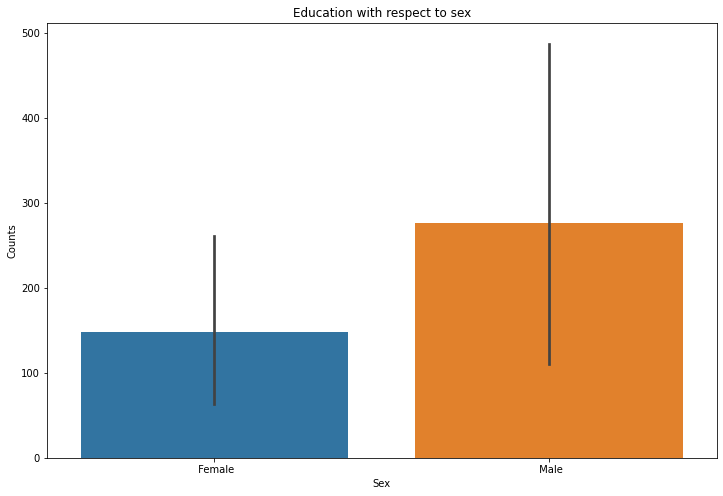

In [21]:
sns.barplot(x='sex', y='Counts', data=education_with_race)
plt.title('Education with respect to sex')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

### Observation : From the above graph we can conclude that more number of males are educated.

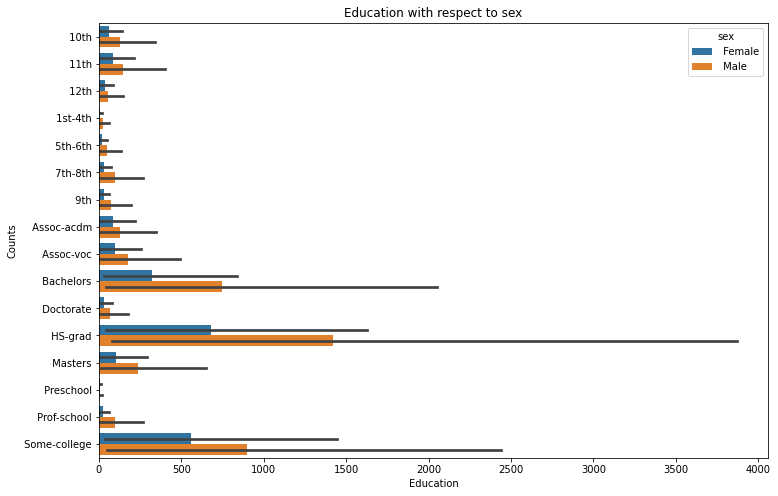

In [22]:
sns.barplot(x='Counts', y='education', hue='sex', data=education_with_race)
plt.title('Education with respect to sex')
plt.xlabel('Education')
plt.ylabel('Counts')
plt.show()

### Observation : More number of High School graduates are Male.

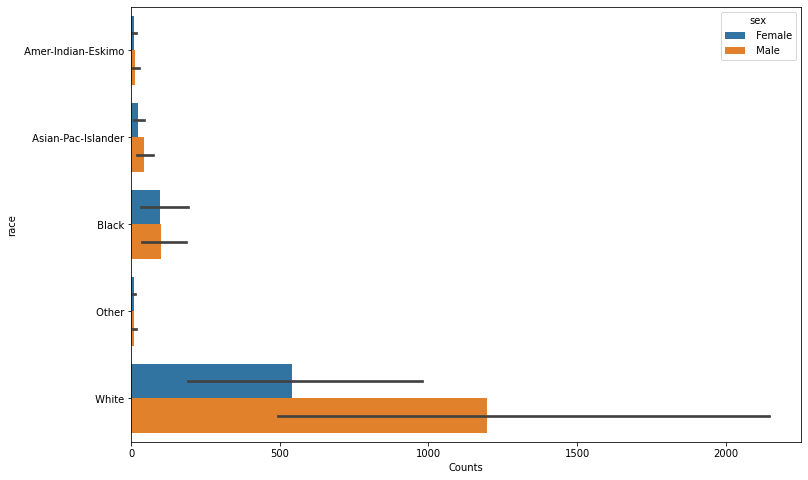

In [23]:
sns.barplot(x='Counts', y='race', hue='sex', data=education_with_race)
plt.show()

### Observation : White Male people's are educated compared to other race.

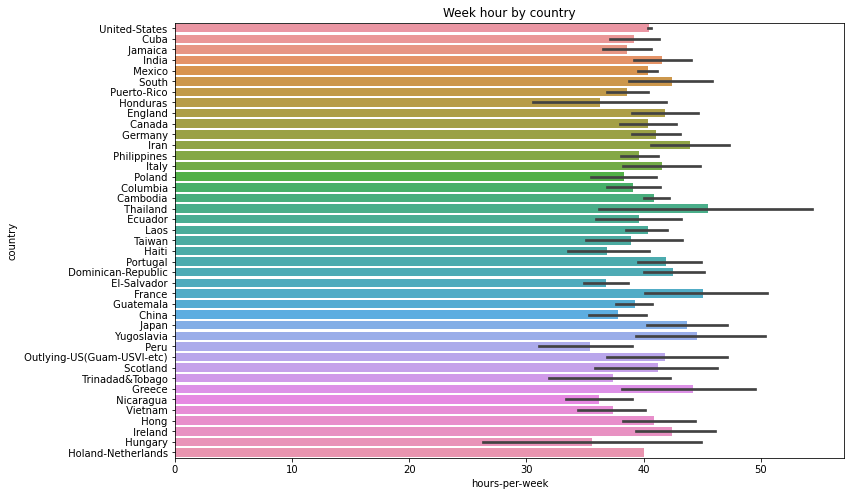

In [24]:
sns.barplot(x='hours-per-week', y='country', data=df)
plt.title('Week hour by country')
plt.show()

### Observation : From the above graph we can conclude that max number of country has minimum of 40 hours per week.

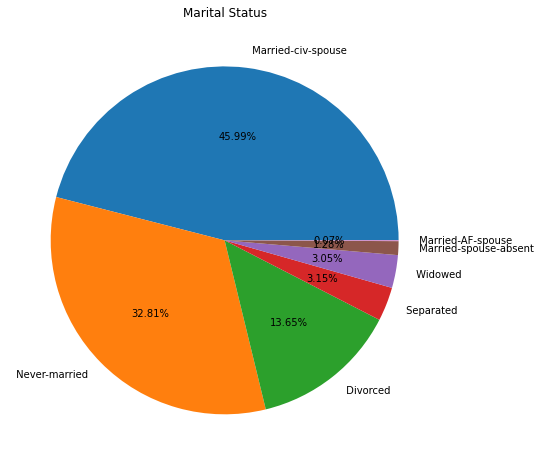

In [25]:
values = df['marital-status'].value_counts().values
labels = df['marital-status'].value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Marital Status')
plt.show()

### Observation : Maximum number of marital status are Married civ spouse and Never-married.

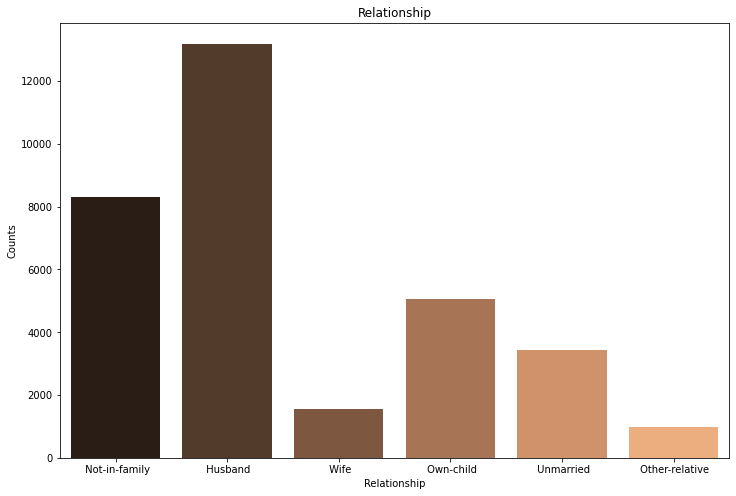

In [26]:
sns.countplot(x='relationship',palette='copper', data=df)
plt.title('Relationship')
plt.xlabel('Relationship')
plt.ylabel('Counts')
plt.show()

In [27]:
education = df.groupby(['education','relationship']).size().reset_index().rename(columns={0:'Counts'})

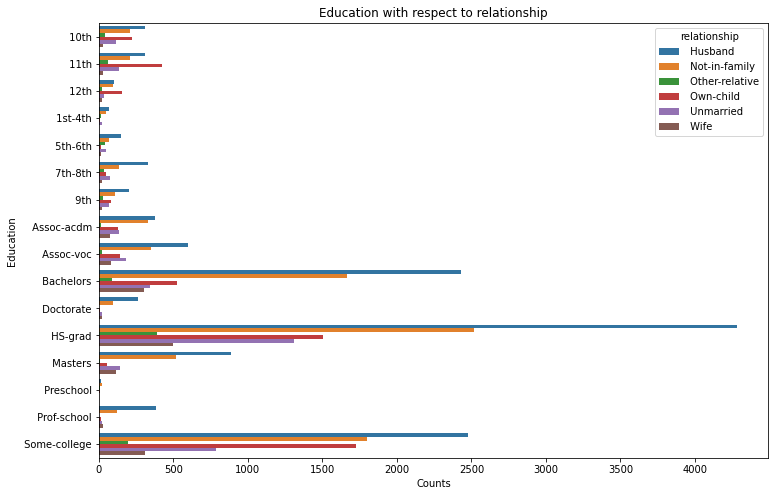

In [28]:
sns.barplot(x='Counts', y='education', hue='relationship', data=education)
plt.title('Education with respect to relationship')
plt.xlabel('Counts')
plt.ylabel('Education')
plt.show()

### Observation : Husband has the more number of High school, Bachelors and Some-college education.

In [29]:
country_education = df.groupby(['sex','country','education']).size().reset_index().rename(columns={0:'Counts'})

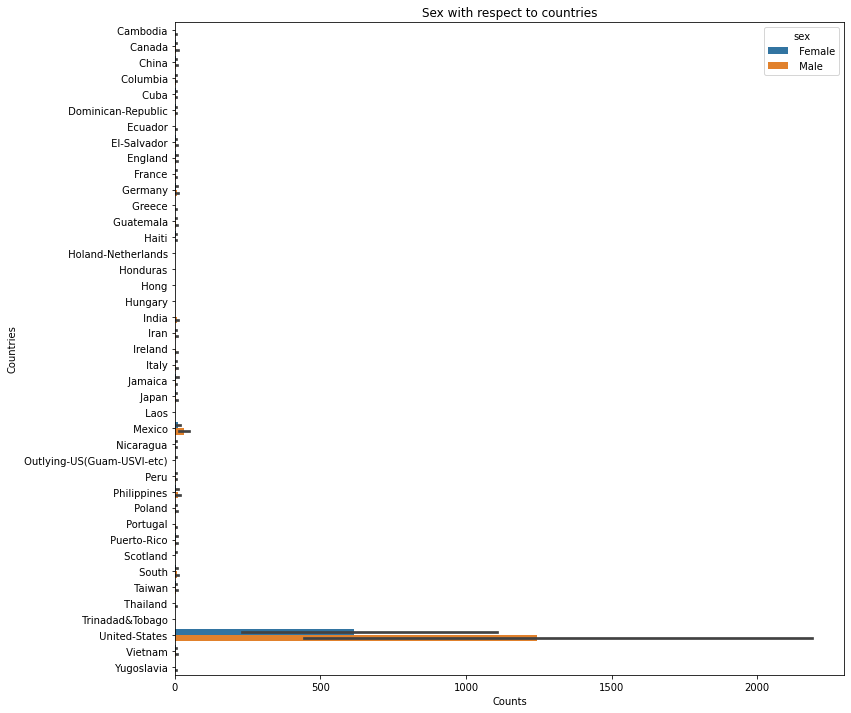

In [30]:
plt.figure(figsize=(12,12))
sns.barplot(x='Counts', y='country', hue='sex', data=country_education)
plt.title('Sex with respect to countries')
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.show()

### Observation : United States has the highest number of males and females.

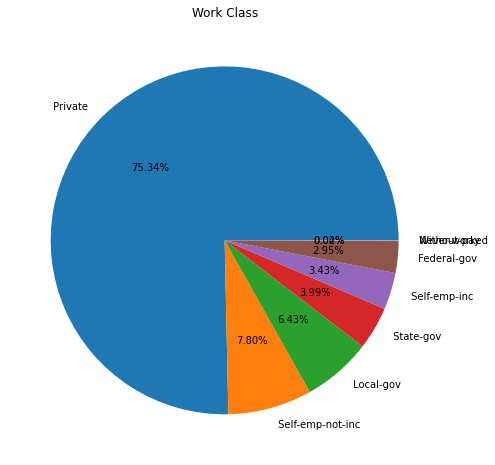

In [31]:
values = df['workclass'].value_counts().values
labels = df['workclass'].value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Work Class')
plt.show()

### Observation : More number of people are working in private sectors.

In [32]:
workclass_sex = df.groupby(['workclass','sex']).size().reset_index().rename(columns={0:'Counts'})

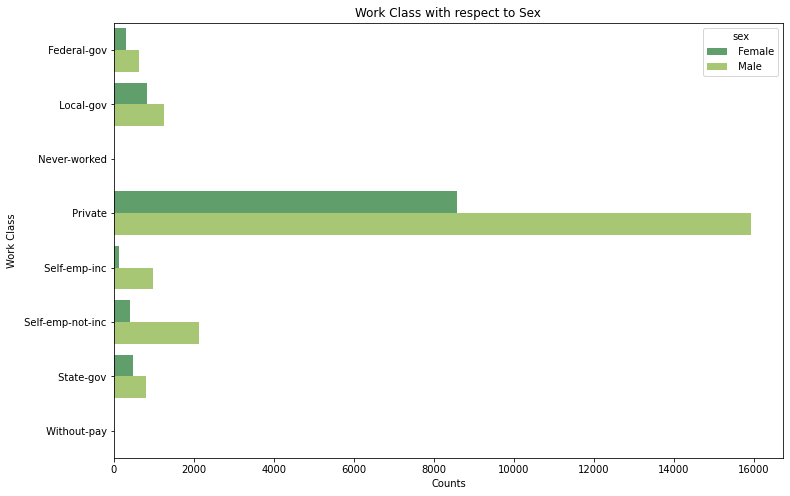

In [33]:
sns.barplot(x='Counts', y='workclass', hue='sex', data=workclass_sex, palette='summer')
plt.title('Work Class with respect to Sex')
plt.xlabel('Counts')
plt.ylabel('Work Class')
plt.show()

### Observation : Most of the Males are working in private sectors.

In [34]:
workclass_country = df.groupby(['workclass','country']).size().reset_index().rename(columns={0:'Counts'})

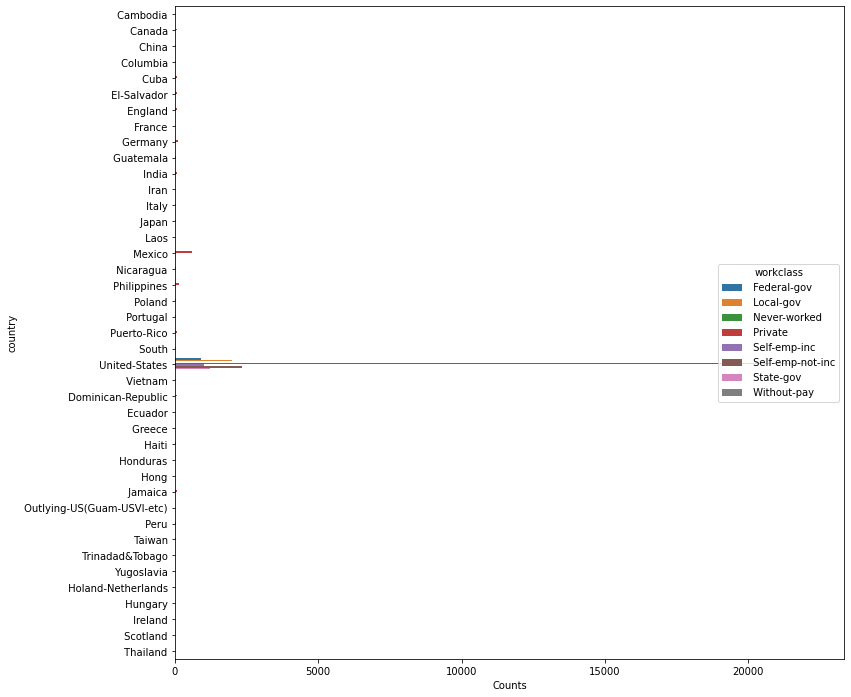

In [35]:
plt.figure(figsize=(12,12))
sns.barplot(x='Counts', y='country', hue='workclass', data=workclass_country)
plt.show()

### Observation : In united states people's are working almost in all the work classes.

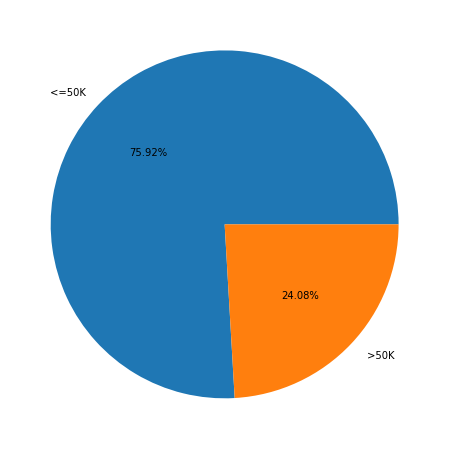

In [36]:
values = df['salary'].value_counts().values
labels = df['salary'].value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.show()

### Observation : Most number of people's salary are less than or equal to 50,000.

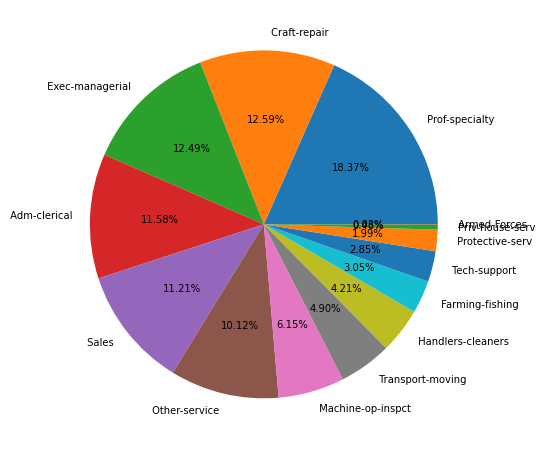

In [37]:
values = df['occupation'].value_counts().values
labels = df['occupation'].value_counts().index
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.show()

### Observation : More number of people occupation are Prof-specialty, craft-repair and Exec-managerial

In [38]:
occupation = df.groupby(['occupation','sex','country']).size().reset_index().rename(columns={0:'Counts'})

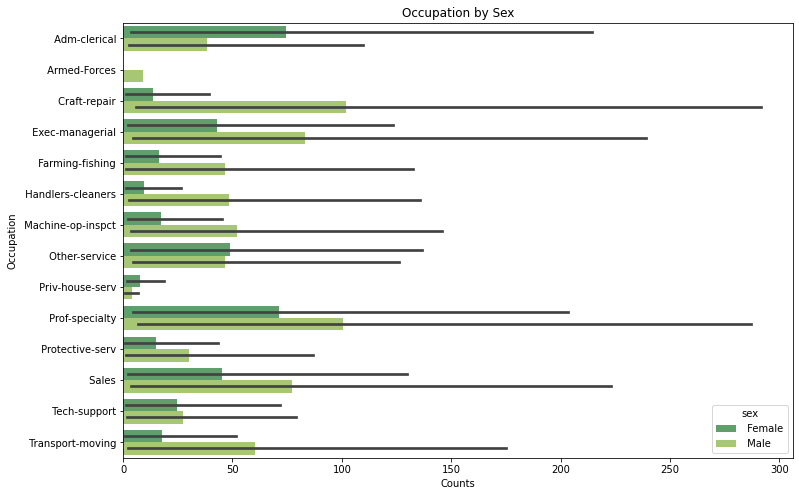

In [39]:
sns.barplot(x='Counts', y='occupation', hue='sex', data=occupation, palette='summer')
plt.title('Occupation by Sex')
plt.xlabel('Counts')
plt.ylabel('Occupation')
plt.show()

### Observation : Males have the highest numbers compared to females in almost all the occupations.

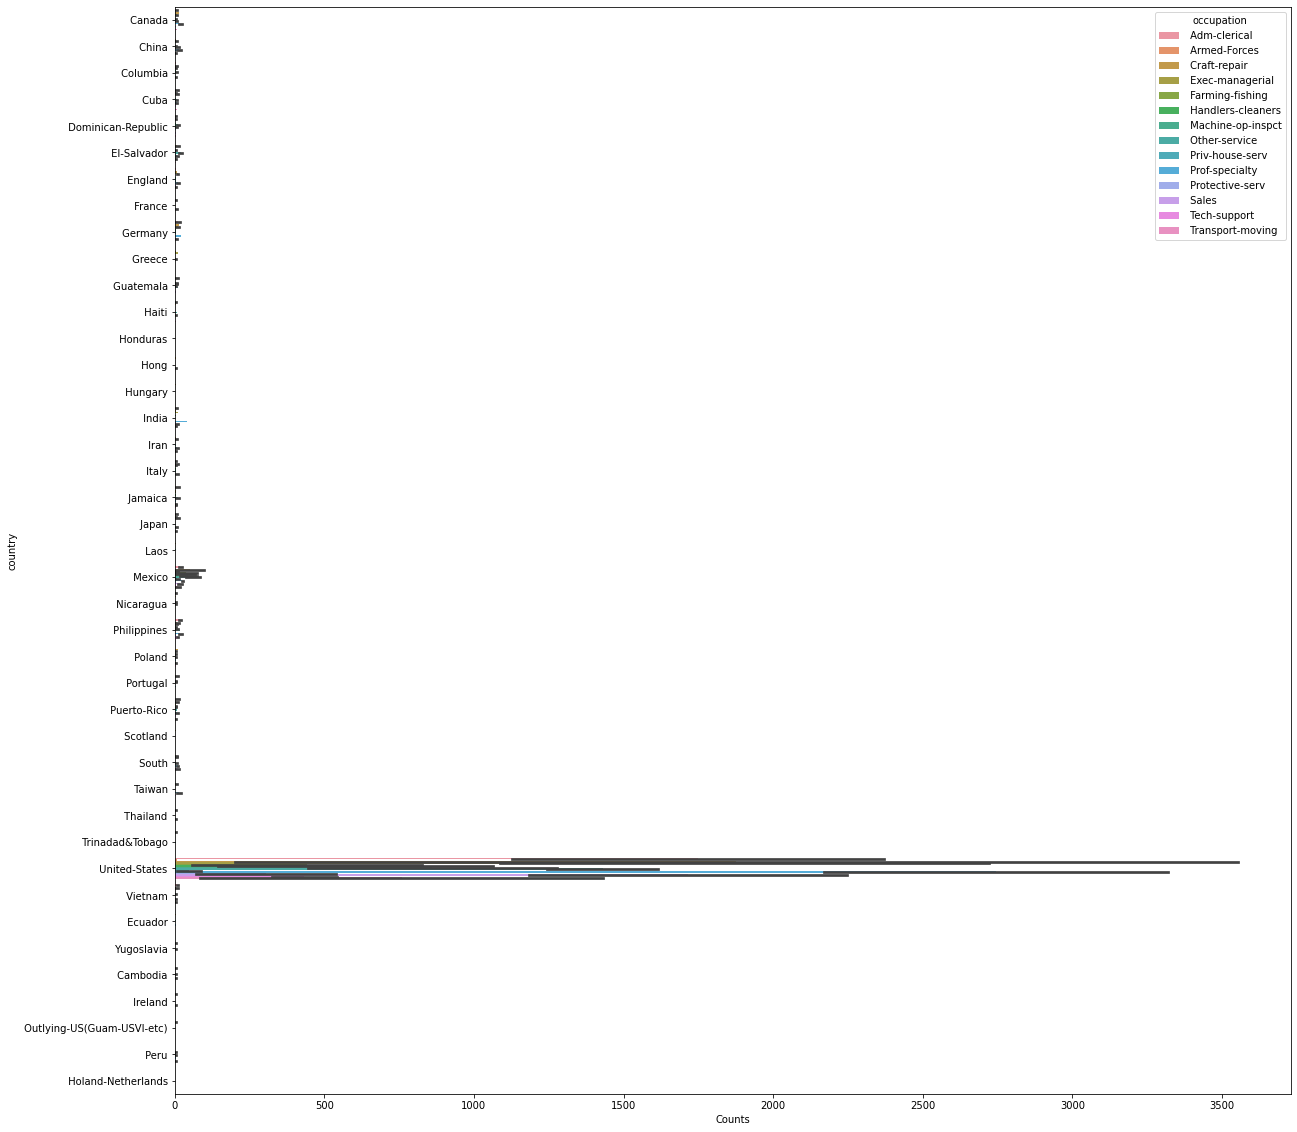

In [40]:
plt.figure(figsize=(20,20))
sns.barplot(x='Counts', y='country', hue='occupation', data=occupation)
plt.show()

### Observation : People in United States are working in all the occupation.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  country         32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [42]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [43]:
# Cleaning education column.
school_education = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','HS-grad']
pu_education = ['11th','12th']
others = ['Some-college','Prof-school','Assoc-voc','Assoc-acdm']
def clean_education(x):
    for edu in school_education:
        if edu in x:
            return 'school education'
    for edu in pu_education:
        if edu in x:
            return 'pre university education'
        if 'Bachelors' in x:
            return 'bachelors'
        if 'Masters' in x:
            return 'masters'
    for edu in others:
        if edu in x:
            return 'others'
        if 'Doctorate' in x:
            return 'doctorate'
df['education'] = df['education'].apply(clean_education)

In [44]:
clean_education('education')

In [45]:
df['education'].value_counts()

school education            13146
others                      10316
bachelors                    5355
masters                      1723
pre university education     1608
doctorate                     413
Name: education, dtype: int64

In [46]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [47]:
# Cleaning sex column.
df['sex'] = df['sex'].map({' Male':1, ' Female':0})

In [48]:
df['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [49]:
# Cleaning workclass column.
govt_jobs = ['Local-gov','State-gov','Federal-gov']
private_jobs = ['Private','Without-pay']
self_employment = ['Self-emp-not-inc','Self-emp-inc']
def clean_workclass(x):
    for job in govt_jobs:
        if job in x:
            return 'govt job'
    for job in private_jobs:
        if job in x:
            return 'private job'
    for job in self_employment:
        if job in x:
            return 'self employment'
    if 'Never-worked' in x:
        return 'never worked'
df['workclass'] = df['workclass'].apply(clean_workclass)

In [50]:
clean_workclass('workclass')

In [51]:
df['workclass'].value_counts()

private job        24546
govt job            4351
self employment     3657
never worked           7
Name: workclass, dtype: int64

In [52]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [53]:
# Cleaning marital-status column.
married = ['Married-civ-spouse','Married-AF-spouse']
single = ['Never-married','Divorced','Separated','Widowed','Married-spouse-absent']
def clean_marital_status(x):
    for status in married:
        if status in x:
            return 'married'
    for status in single:
        if status in x:
            return 'single'
df['marital-status'] = df['marital-status'].apply(clean_marital_status)

In [54]:
df['marital-status'].value_counts()

single     17562
married    14999
Name: marital-status, dtype: int64

# Feature Engineering
Performing One-Hot encoding with many variables.

In [55]:
top_10 = [x for x in df['occupation'].value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    df[label] = np.where(df['occupation']==label,1,0)

Performing Ordinal encoding (Assigning values based on the ranks.)

In [56]:
workclass_mapped = {'private job':1, 'govt job':2, 'self employment':3, 'never worked':4}
df['workclass'] = df['workclass'].map(workclass_mapped)

In [57]:
education_mapped = {'school education':1, 'pre university education':2, 'bachelors':3, 'masters':4, 'doctorate':5, 'others':6}
df['education'] = df['education'].map(education_mapped)

In [58]:
df['marital-status'] = df['marital-status'].map({'single':1, 'married':0})

In [59]:
df['salary'] = np.where(df['salary']==' <=50K',0,1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  int64 
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  int64 
 4   education-num       32561 non-null  int64 
 5   marital-status      32561 non-null  int64 
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  int64 
 10  capital-gain        32561 non-null  int64 
 11  hours-per-week      32561 non-null  int64 
 12  country             32561 non-null  object
 13  salary              32561 non-null  int32 
 14   Prof-specialty     32561 non-null  int32 
 15   Craft-repair       32561 non-null  int32 
 16   Exec-managerial    32

In [61]:
# Dropping the unwanted columns.
df.drop(['fnlwgt','education-num','occupation','relationship','race','capital-gain','country'], axis=1, inplace=True)

In [62]:
# Renaming the columns.
df.rename(columns=lambda x: x.replace(' ',''), inplace=True)
df.rename(columns=lambda x: x.replace('-','_'), inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                32561 non-null  int64
 1   workclass          32561 non-null  int64
 2   education          32561 non-null  int64
 3   marital_status     32561 non-null  int64
 4   sex                32561 non-null  int64
 5   hours_per_week     32561 non-null  int64
 6   salary             32561 non-null  int32
 7   prof_specialty     32561 non-null  int32
 8   craft_repair       32561 non-null  int32
 9   exec_managerial    32561 non-null  int32
 10  adm_clerical       32561 non-null  int32
 11  sales              32561 non-null  int32
 12  other_service      32561 non-null  int32
 13  machine_op_inspct  32561 non-null  int32
 14  transport_moving   32561 non-null  int32
 15  handlers_cleaners  32561 non-null  int32
 16  farming_fishing    32561 non-null  int32
dtypes: int32(11)

In [64]:
# Dividing the data into Dependent and Independent columns.
X = df.drop('salary', axis=1)
y = df['salary']

In [65]:
X.columns

Index(['age', 'workclass', 'education', 'marital_status', 'sex',
       'hours_per_week', 'prof_specialty', 'craft_repair', 'exec_managerial',
       'adm_clerical', 'sales', 'other_service', 'machine_op_inspct',
       'transport_moving', 'handlers_cleaners', 'farming_fishing'],
      dtype='object')

In [66]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

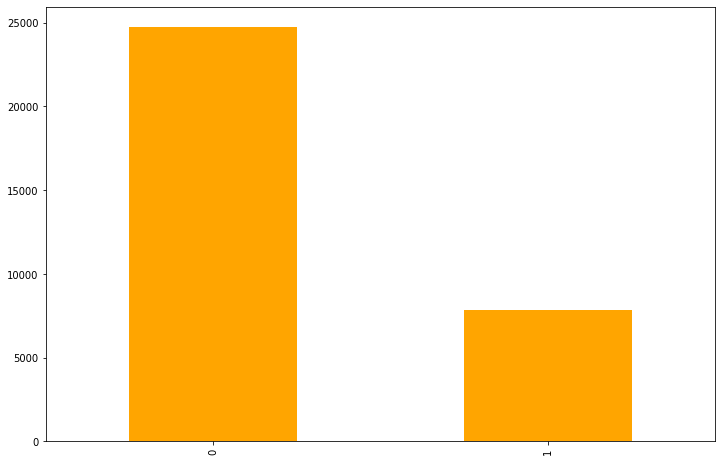

In [67]:
# Plotting the target variables to check whether the datas are balanced or not.
y.value_counts().plot(kind='bar', color='orange')
plt.xticks(rotation=90)

In [68]:
# Rearranging of columns.
X = X[['age', 'marital_status', 'sex',
       'hours_per_week', 'prof_specialty', 'craft_repair', 'exec_managerial',
       'adm_clerical', 'sales', 'other_service', 'machine_op_inspct',
       'transport_moving', 'handlers_cleaners', 'farming_fishing', 'workclass', 'education']]

# Handling the Imbalaced Dataset.

In [69]:
# Applying the oversampling technique to balance the data.
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy='minority')
X_res, y_res = os.fit_resample(X, y)

In [70]:
# Splitting the data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [71]:
'''from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train, random_state=42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)'''

'from sklearn.feature_selection import mutual_info_classif\nmutual_info = mutual_info_classif(X_train, y_train, random_state=42)\nmutual_info = pd.Series(mutual_info)\nmutual_info.index = X_train.columns\nmutual_info.sort_values(ascending=False)'

In [72]:
'''from sklearn.feature_selection import SelectKBest
selected_feature = SelectKBest(mutual_info_classif, k=10)
selected_feature.fit(X_train, y_train)
X_train.columns[selected_feature.get_support()]'''

'from sklearn.feature_selection import SelectKBest\nselected_feature = SelectKBest(mutual_info_classif, k=10)\nselected_feature.fit(X_train, y_train)\nX_train.columns[selected_feature.get_support()]'

## Model Creation.

In [73]:
# Fitting Logistic Regression to training data.
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [74]:
lr.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred_lr = lr.predict(X_test)

In [76]:
# Accuracy score to check the performance of the Logistic Regression.
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
print('Accuracy score for Logistic Regression : {}'.format(logistic_regression_score))

Accuracy score for Logistic Regression : 0.7864077669902912


In [77]:
# Fitting K-Nearest Neighbor Classifier to training data.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [79]:
y_pred_knn = knn.predict(X_test)

In [80]:
# Checking the performance of the K-Nearest Neighbors Classifier.
knn_score = accuracy_score(y_test, y_pred_knn)
print('Accuracy score for K-Nearest Neighbor Classifier : {}'.format(knn_score))

Accuracy score for K-Nearest Neighbor Classifier : 0.7973300970873787


In [81]:
# Fitting Naive Bayes Classifier to training data.
from sklearn.naive_bayes import GaussianNB
naive_bayes_classif = GaussianNB()

In [82]:
naive_bayes_classif.fit(X_train, y_train)

GaussianNB()

In [83]:
y_pred = naive_bayes_classif.predict(X_test)

In [84]:
# Accuracy score to check the performance of Naive Bayes.
naive_bayes_score = accuracy_score(y_test, y_pred)
print('Accuracy score for Naive Bayes Classifier : {}'.format(naive_bayes_score))

Accuracy score for Naive Bayes Classifier : 0.7484830097087378


In [85]:
# Fitting Random Forest Classifier to training data.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classf = RandomForestClassifier()
rf_classf.fit(X_train, y_train)

parameters = {'n_estimators': [10,15,20,50,100,200]}

rf_classifier = GridSearchCV(rf_classf, param_grid=parameters, cv=5)
rf_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 15, 20, 50, 100, 200]})

In [86]:
y_pred_rf = rf_classifier.predict(X_test)

In [87]:
# Accuracy score to check the performance of Random Forest Classifier.
random_forest_score = accuracy_score(y_test, y_pred_rf)
print('Accuracy score for Random Forest Classifier : {}'.format(random_forest_score))

Accuracy score for Random Forest Classifier : 0.8744943365695793


In [88]:
# Fitting XG Boost Classifier to training data.
from xgboost.sklearn import XGBClassifier
xg_classf = XGBClassifier()

In [89]:
xg_classf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [90]:
y_pred_xg = xg_classf.predict(X_test)

In [91]:
# Accuracy score to check the performance of XG Boost Classifier.
xgboost_score = accuracy_score(y_test, y_pred_xg)
print('Accuracy score for XG Boost Classifier : {}'.format(xgboost_score))

Accuracy score for XG Boost Classifier : 0.8288834951456311


In [92]:
# Fitting Ada Boost Classifier to the training data.
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

In [93]:
adb.fit(X_train, y_train)

AdaBoostClassifier()

In [94]:
y_pred_adb = adb.predict(X_test)

In [95]:
# Accuracy score to check the performance of the Ada Boost Classifier.
adaboost_score = accuracy_score(y_test, y_pred_adb)
print('Accuracy score for Ada Boost Classifier : {}'.format(adaboost_score))

Accuracy score for Ada Boost Classifier : 0.7986448220064725


In [96]:
# Converting all the models and scores into DataFrame.
model_scores = pd.DataFrame({'Models':['Logistic Regression','K-Nearest Neighbors','Naive Bayes','Random Forest','XG Boost','Ada Boost'],'Scores':[logistic_regression_score,knn_score,naive_bayes_score, random_forest_score, xgboost_score, adaboost_score]})

In [97]:
# Models and their scores.
model_scores

,Models,Scores
0,Logistic Regression,0.786408
1,K-Nearest Neighbors,0.797330
2,Naive Bayes,0.748483
3,Random Forest,0.874494
4,XG Boost,0.828883
5,Ada Boost,0.798645


### From the above models we can conclude that Random Forest Classifier has the highest accuracy score with 87%.

In [98]:
# Plotting Confusion metrics for the Random Forest Classifier.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[3990,  948],
       [ 293, 4657]], dtype=int64)

Text(87.0, 0.5, 'Actual values')

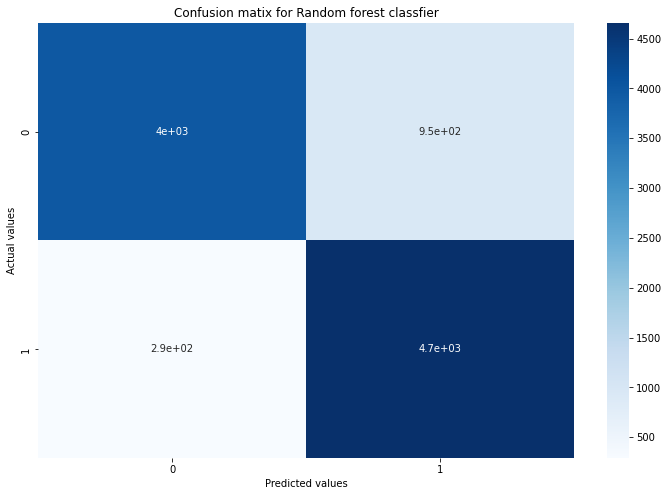

In [99]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matix for Random forest classfier')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

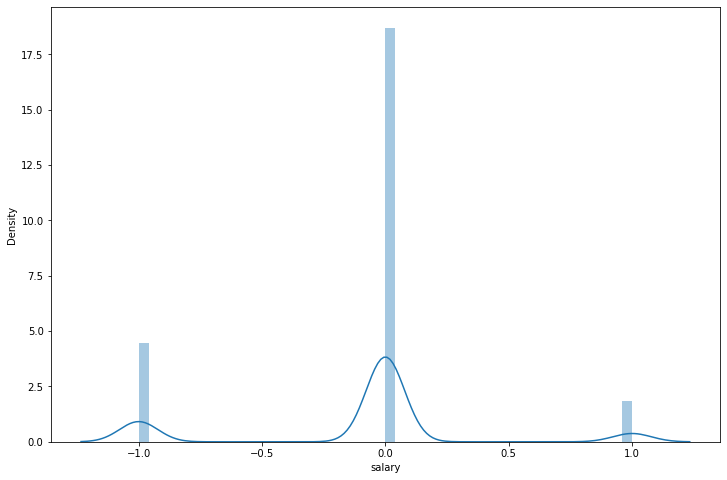

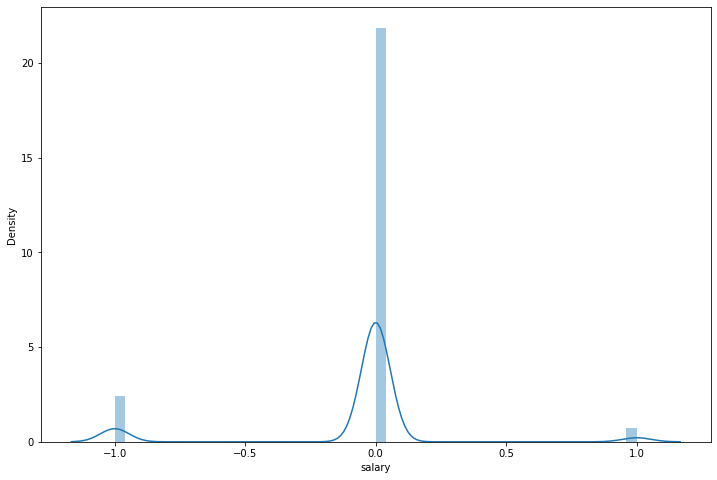

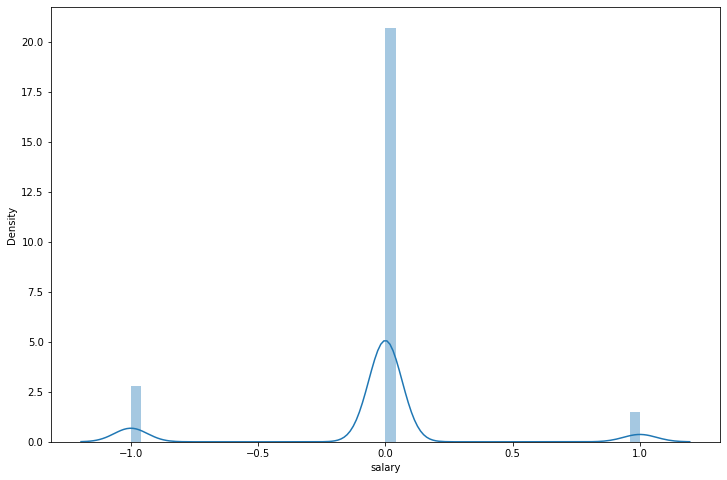

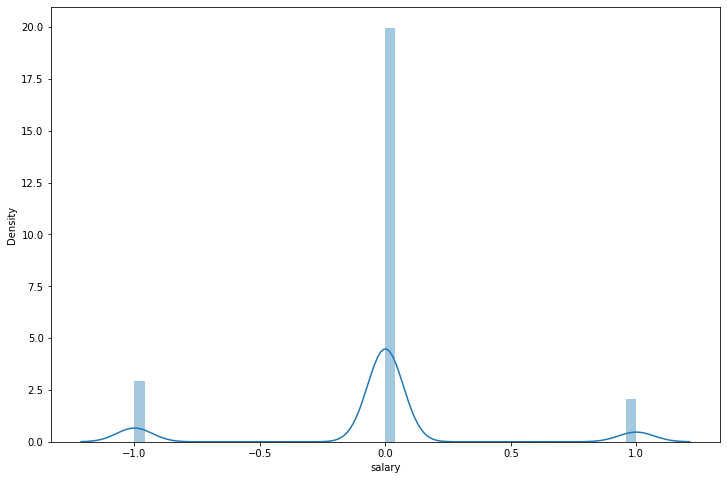

In [100]:
# Plotting the distribution plot for the actual values and predicted values.
for score in [y_pred, y_pred_rf, y_pred_xg, y_pred_adb]:
    sns.distplot(y_test-score, kde=True)
    plt.show()

In [101]:
X.columns

Index(['age', 'marital_status', 'sex', 'hours_per_week', 'prof_specialty',
       'craft_repair', 'exec_managerial', 'adm_clerical', 'sales',
       'other_service', 'machine_op_inspct', 'transport_moving',
       'handlers_cleaners', 'farming_fishing', 'workclass', 'education'],
      dtype='object')

# Model Predictions.

In [112]:
def predict_salary(age, marital_status, sex, hours_per_week, occupation, workclass, education):
    array = list()
    
    array.append(np.array(age).reshape(1, -1))
    
    if 'single' in marital_status:
        array.append(1)
    else:
        array.append(0)
        
    if 'male' in sex:
        array.append(1)
    else:
        array.append(0)
    
    array.append(np.array(hours_per_week).reshape(1, -1))
    
    occupation_columns = ['prof_specialty', 'craft_repair', 'exec_managerial',
       'adm_clerical', 'sales', 'other_service', 'machine_op_inspct',
       'transport_moving', 'handlers_cleaners', 'farming_fishing']
    temp = list(map(int, np.zeros(shape=(1, len(occupation_columns)))[0]))
    for index in range(0, len(occupation_columns)):
        if occupation_columns[index] == occupation:
            temp[index] = 1
            break
    array = array+temp
    
    workclass_mapped = {'private job':1, 'govt job':2, 'self employment':3, 'never worked':4}
    array.append(workclass_mapped[workclass])
    
    education_mapped = {'school education':1, 'pre university education':2, 'bachelors':3, 'masters':4, 'doctorate':5, 'others':6}
    array.append(education_mapped[education])
    
    array = np.array([array])
    
    return rf_classifier.predict(array)[0]

In [113]:
# Prediction 1
# Inputs : Age, Marital status, Sex, Hours per week, Occupation, Work class, Education.
salary = predict_salary(23, 'single', 'male', 45, 'sales', 'private job', 'masters')
if salary:
    print('Great! your income is greater than 50,000')
else:
    print('Your income is less than 50,000')

Your income is less than 50,000


In [114]:
# Prediction 2
# Inputs : Age, Marital status, Sex, Hours per week, Occupation, Work class, Education.
salary = predict_salary(54, 'married', 'male', 40, 'prof_specialty', 'private job', 'doctorate')
if salary:
    print('Great! your income is greater than 50,000')
else:
    print('Your income is less than 50,000')

Great! your income is greater than 50,000


In [115]:
# Prediction 3
# Inputs : Age, Marital status, Sex, Hours per week, Occupation, Work class, Education.
salary = predict_salary(24, 'married', 'male', 10, 'other_service', 'never worked', 'doctorate')
if salary:
    print('Great! your income is greater than 50,000')
else:
    print('Your income is less than 50,000')

Your income is less than 50,000


In [116]:
# Prediction 4
# Inputs : Age, Marital status, Sex, Hours per week, Occupation, Work class, Education.
salary = predict_salary(23, 'married', 'female', 36, 'exec_managerial', 'govt job', 'bachelors')
if salary:
    print('Great! your income is greater than 50,000')
else:
    print('Your income is less than 50,000')

Your income is less than 50,000


In [117]:
# Prediction 5
# Inputs : Age, Marital status, Sex, Hours per week, Occupation, Work class, Education.
salary = predict_salary(47, 'married', 'female', 39, 'exec_managerial', 'self employment', 'school education')
if salary:
    print('Great! your income is greater than 50,000')
else:
    print('Your income is less than 50,000')

Great! your income is greater than 50,000
